# Sign Language Digits ( PCA )

Load needed libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

%config InlineBackend.figure_format = 'retina'

Load Data

In [2]:
X = np.load('input/dataset/X.npy') #feature dataset
Y = np.load('input/dataset/Y.npy') #target dataset

In [3]:
X.shape

(2062, 64, 64)

The Sign language digits dataset is formed of 2062 images, each 64x64

In [4]:
Y.shape

(2062, 10)

In [5]:
# Convert 3d array into 2d array
nsamples, nx, ny = X.shape
X = X.reshape((nsamples, nx*ny))

In [6]:
pca = decomposition.PCA(n_components=2)

Train PCA on our training set and transform the data

In [7]:
pc = pca.fit_transform(X)

In [8]:
pc

array([[-1.0415044 , -4.0940313 ],
       [-0.08196031,  1.6973552 ],
       [-0.31206152,  2.5125797 ],
       ...,
       [-2.4160643 , -0.5653603 ],
       [-1.1746795 , -2.235089  ],
       [ 6.0755653 , -3.152407  ]], dtype=float32)

In [9]:
# Target values
print(np.where(Y == 1)[1])

[0 0 0 ... 9 9 9]


Create principal component dataframe

In [10]:
pc_df = pd.DataFrame(data = pc, 
                     columns = ['PC1', 'PC2'])
pc_df['Cluster'] = np.where(Y == 1)[1]
pc_df.describe()

,PC1,PC2,Cluster
count,2062.000000,2062.000000,2062.000000
mean,0.000108,0.000007,4.508729
std,2.929425,2.250163,2.869247
min,-6.219230,-6.800633,0.000000
25%,-1.544185,-1.626735,2.000000
50%,-0.486294,0.242155,5.000000
75%,0.464656,1.676780,7.000000
max,12.248363,6.805909,9.000000


PCA explained variance ratio

In [11]:
pca.explained_variance_ratio_

array([0.12000257, 0.07080337], dtype=float32)

The pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension.

Histogram

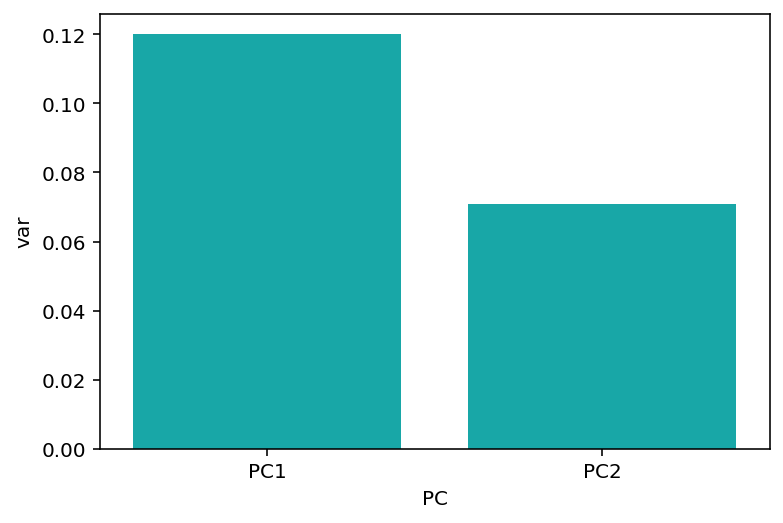

In [12]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

Scatterplot


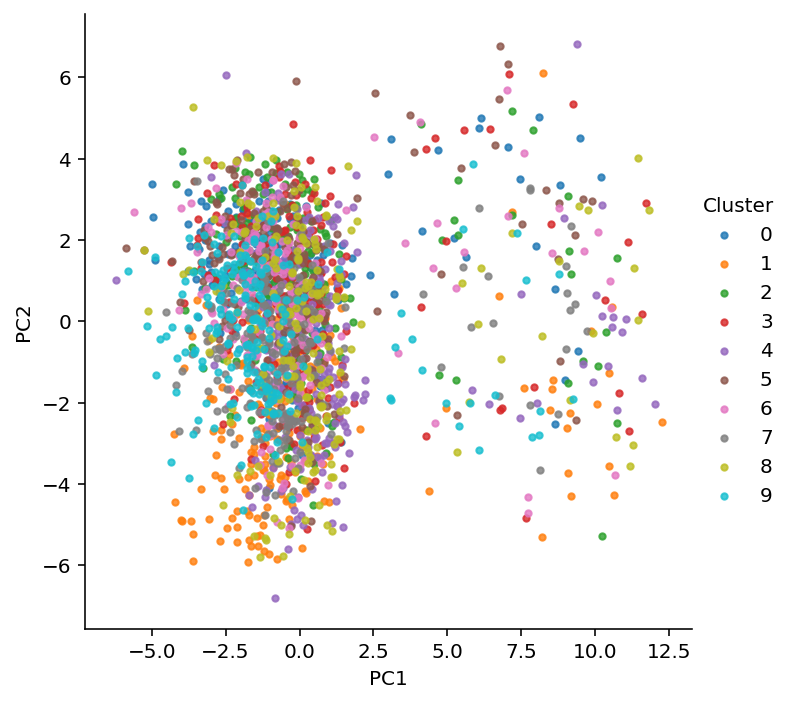

In [13]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 10}) # specify the point size